In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file
import matplotlib.pyplot as plt  # plotting and data visualization
import seaborn as sns # statistical data visualization

# ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
# Ignore FutureWarning from SciPy
warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
%matplotlib inline

In [42]:
import pandas as pd 
data=pd.read_csv("heart_disease.csv")
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [65]:
# logistic regression
# predict one or more possibel outcomes
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [44]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


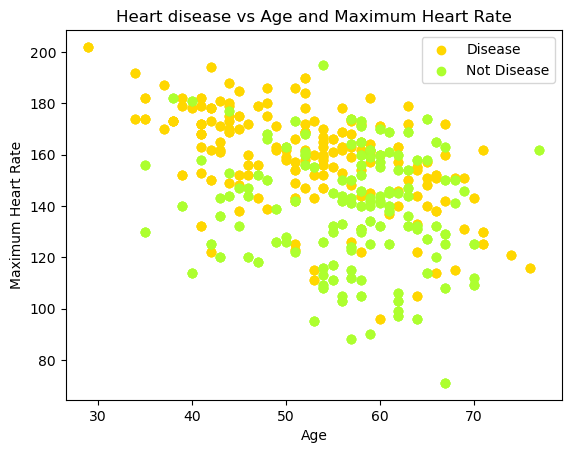

In [66]:
age = data['age']
chol = data['chol']

# Create scatter plot
plt.scatter(x=data.age[data.target==1], y=data.thalach[data.target==1],c='#FFD700',label='Disease')
plt.scatter(x=data.age[data.target==0], y=data.thalach[data.target==0],c='#ADFF2F',label='Not Disease')
plt.legend()   #add legend
plt.xlabel('Age') #adding labels to the axes
plt.ylabel('Maximum Heart Rate')
plt.title('Heart disease vs Age and Maximum Heart Rate')# set title
#show plot
plt.show()

In [67]:
# create a logistic regression
# helps solve problems with classification
y=data.target.values
x_data=data.drop(['target'],axis=1)

In [68]:
#normalize the data
x=(x_data-np.min(x_data))/(np.max(x_data))-np.min(x_data)

In [69]:
# split the data 80% for training and 20 for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13, 820)
y_train shape: (820,)
X_test shape: (13, 205)
y_test shape: (205,)


In [60]:
# Transpose matrices
#x_train=x_train.T
#y_train=y_train.T
#x_test=x_test.T
#y_test=y_test.T

In [70]:
import warnings
# Ignore FutureWarning from SciPy
warnings.simplefilter(action='ignore', category=FutureWarning)
# get the accuracy using logistic regression 
# getting the test accuracy
accuracies={}
lr=LogisticRegression()
lr.fit(x_train, y_train)
acc=lr.score(x_test, y_test)*100

accuracies['LogisticRegression']=acc
print('Test accuracy {:.2f}%'.format(acc))

Test accuracy 80.49%


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# import knn classifier to get accuracy score of knn algoritm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

# Calculate test accuracy
acc = knn.score(x_test, y_test) * 100

print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 94.63%


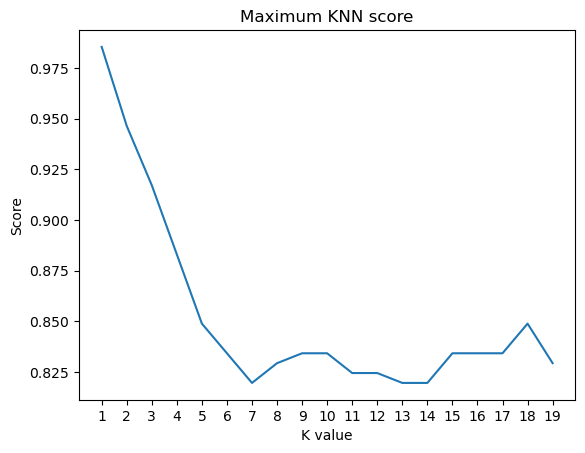

Maximum KNN score is 98.54%


In [80]:
# get maximum knn score
score_list =[]
for i in range(1,20):
     knn2=KNeighborsClassifier(n_neighbors=i) # get n neighbors means k
     knn2.fit(x_train,y_train)
     score_list.append(knn2.score(x_test, y_test))
#show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

acc=max(score_list)*100
accuracies['KNN']=acc
print('Maximum KNN score is {:.2f}%'.format(acc))

In [82]:
# Get test accuracy using support vector machine
from sklearn.svm import SVC
svm =SVC(random_state=1)
svm.fit(x_train, y_train)
acc=svm.score(x_train, y_train)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM algorithm:{:.2f}%'.format(acc))

Test Accuracy of SVM algorithm:51.59%


In [85]:
# get accuracy using naive bayes algorithm
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train, y_train)

acc=nb.score(x_test, y_test*100)
accuracies['Naive Bayes']=acc
print('Accuracy of naive bayes: {:.2f}%'.format(acc))

Accuracy of naive bayes: 0.35%


In [86]:
# get accuracy using decision tree
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc =dtc.score(x_test, y_test)*100
accuracies['Decision Tree']= acc

print('Decision tree test accuracy {:.2f}%'.format(acc))

Decision tree test accuracy 98.54%


In [88]:
# get accuracy of random forest classifier algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train, y_train)

acc=rf.score(x_test, y_test)*100
accuracies['Random Forest']=acc

print('Random Forest Algorithm Accuracy score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy score: 98.54%


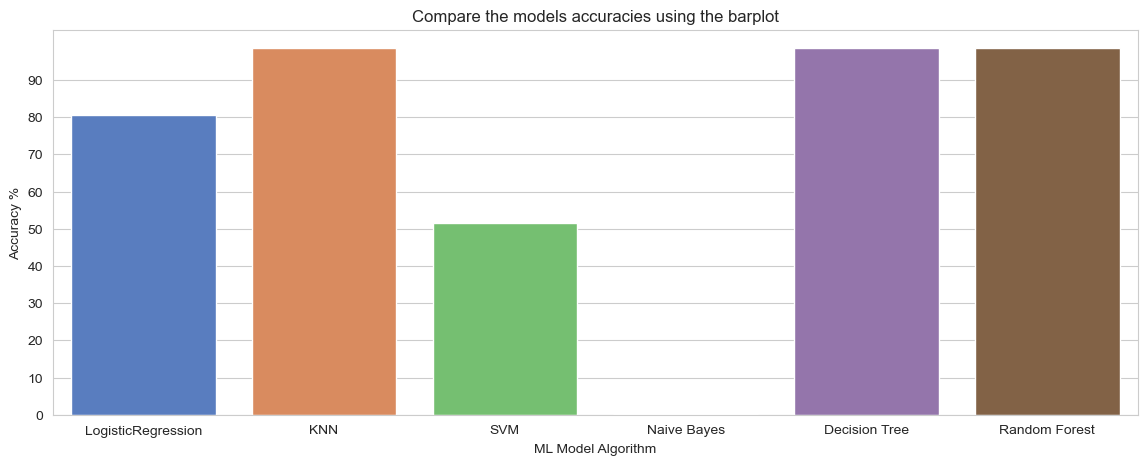

In [99]:
# compare the models accuracies
colors=['#008BBB','228B22','#5F9EA0','#0FBBAE','#DAA520','CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='muted')
plt.show()

In [101]:
# ML confusion matrix
# evaluate the performance of classification model
# get confusion matrix to look at the imbalanced data set
y_head_lr=lr.predict(x_test)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_head_knn=knn3.predict(x_test)
y_head_svm=svm.predict(x_test)
y_head_nb=nb.predict(x_test)
y_head_dtc=dtc.predict(x_test)
y_head_rf =rf.predict(x_test)

In [116]:
# import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr=confusion_matrix(y_test, y_head_lr)
cm_knn=confusion_matrix(y_test, y_head_knn)
cm_svm=confusion_matrix(y_test, y_head_svm)
cm_nb=confusion_matrix(y_test, y_head_nb)
cm_dtc=confusion_matrix(y_test, y_head_dtc)
cm_rf=confusion_matrix(y_test, y_head_rf)

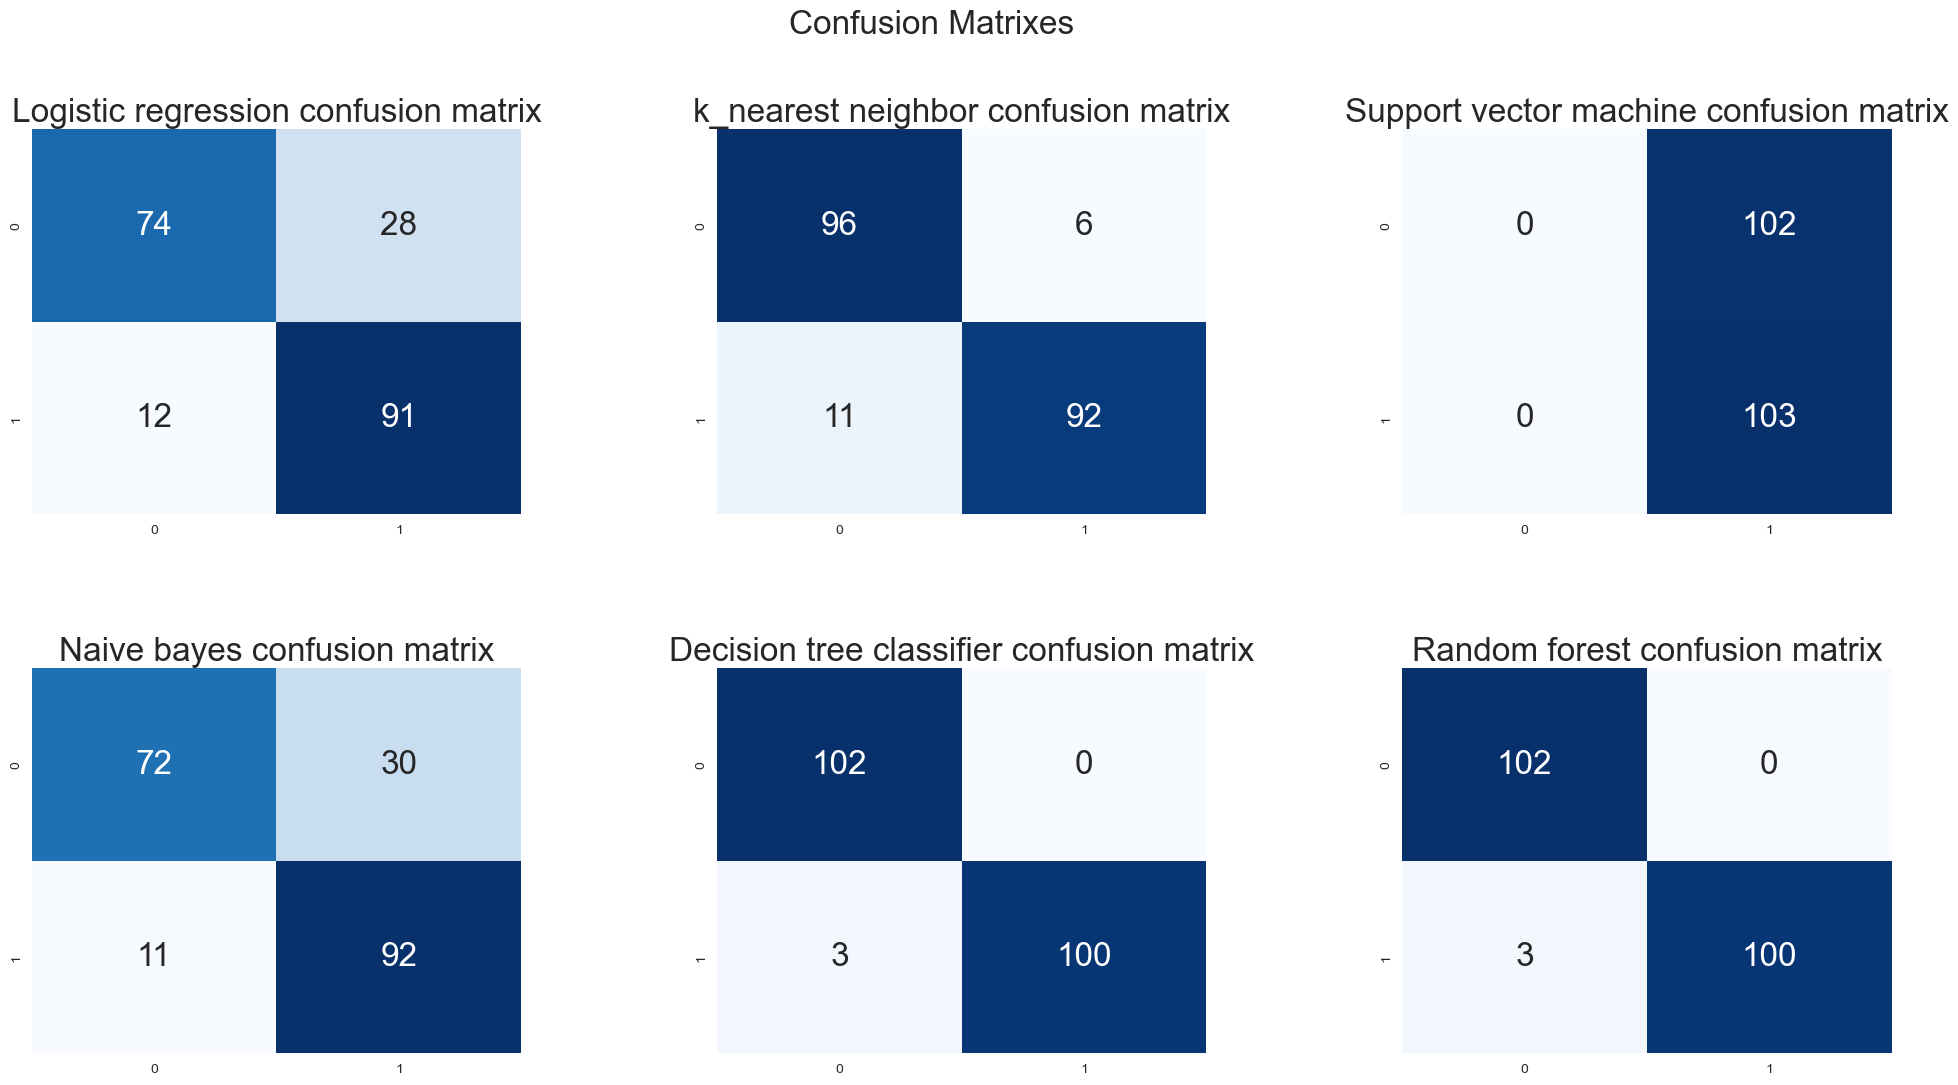

In [129]:

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# heatmap for Logistic regression confusion matrix 
plt.subplot(2,3,1)
plt.title('Logistic regression confusion matrix', fontsize=24)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

# heatmap for k nearest neighbor
plt.subplot(2,3,2)
plt.title('k_nearest neighbor confusion matrix', fontsize=24)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

# heatmap for support vector machine
plt.subplot(2,3,3)
plt.title('Support vector machine confusion matrix', fontsize=24)
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

# heatmap for naive bayes
plt.subplot(2,3,4)
plt.title('Naive bayes confusion matrix', fontsize=24)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

# heatmap for decision tree classifier
plt.subplot(2,3,5)
plt.title('Decision tree classifier confusion matrix', fontsize=24)
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

# heatmap for random forest
plt.subplot(2,3,6)
plt.title('Random forest confusion matrix', fontsize=24)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.show()

In [ ]:
# confusion matrix allows us understand how the model is performing and identify specific areas of improvement especially when it comes to dealing with imbalanced datasets or when different types of errors have different costs or condsequences